# importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

%matplotlib inline

#### Import a 311 NYC service request

In [2]:
data=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False,parse_dates=['Created Date','Closed Date'])

### here above we have changed created date and closed date type from object to datetime

## first five rows

In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

In [5]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
data.size

19321574

In [7]:
data.shape

(364558, 53)

## checking out the null values

In [8]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

### graphically

Text(0, 0.5, 'VALUE COUNT')

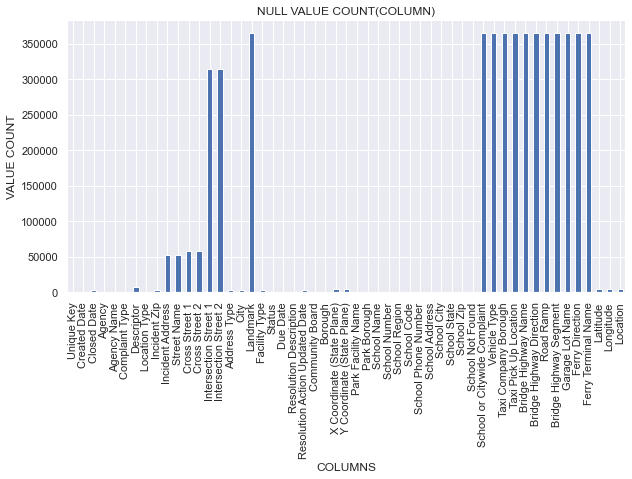

In [9]:
data.isnull().sum().plot(kind='bar',alpha=1,figsize=(10,5))
plt.title('NULL VALUE COUNT(COLUMN)')
plt.xlabel('COLUMNS')
plt.ylabel('VALUE COUNT')

### creating the new dataset with required columns

In [10]:
new_dataframe=data[['Created Date', 'Closed Date','Agency Name',
       'Complaint Type','Descriptor','Location Type', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location']]
new_dataframe.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,Facility Type,Status,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,2015-12-31 23:59:45,2016-01-01 00:55:15,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,ADDRESS,NEW YORK,Precinct,Closed,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,2015-12-31 23:59:44,2016-01-01 01:26:57,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,ASTORIA,Precinct,Closed,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,2015-12-31 23:59:29,2016-01-01 04:51:03,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,2015-12-31 23:57:46,2016-01-01 07:43:13,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,2015-12-31 23:56:58,2016-01-01 03:24:42,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ADDRESS,ELMHURST,Precinct,Closed,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### checking out the columns that can be prove not helpful in further analysis

In [11]:
data['School Code'].unique()

array(['Unspecified', nan], dtype=object)

In [12]:
data['School Phone Number'].unique()

array(['Unspecified', '7182176034'], dtype=object)

In [13]:
data['School Address'].unique()

array(['Unspecified', 'Grand Central Parkway, near the soccer field'],
      dtype=object)

In [14]:
data['School Address'].value_counts()

Unspecified                                     364557
Grand Central Parkway, near the soccer field         1
Name: School Address, dtype: int64

In [15]:
data['School City'].unique()

array(['Unspecified', 'QUEENS'], dtype=object)

In [16]:
data['School City'].value_counts()

Unspecified    364557
QUEENS              1
Name: School City, dtype: int64

In [17]:
data['School State'].unique()

array(['Unspecified', 'NY'], dtype=object)

In [18]:
data['School Region'].unique()

array(['Unspecified', nan], dtype=object)

In [19]:
data['School Not Found'].unique()

array(['N'], dtype=object)

In [20]:
new_dataframe['Address Type'].unique()

array(['ADDRESS', nan, 'INTERSECTION', 'LATLONG', 'BLOCKFACE',
       'PLACENAME'], dtype=object)

In [21]:
new_dataframe['Address Type'].value_counts()

ADDRESS         292699
INTERSECTION     50514
BLOCKFACE        13786
LATLONG           3931
PLACENAME          376
Name: Address Type, dtype: int64

In [22]:
new_dataframe['Park Facility Name'].unique()

array(['Unspecified', 'Alley Pond Park - Nature Center'], dtype=object)

In [23]:
new_dataframe['Park Facility Name'].value_counts()

Unspecified                        364557
Alley Pond Park - Nature Center         1
Name: Park Facility Name, dtype: int64

### the below mentioned columns weren,t giving the useful information statistically, most of them were containg same value

In [24]:
new_dataset=new_dataframe.drop(columns=['School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found','Park Facility Name'],axis=1)

In [25]:
new_dataset.shape

(364558, 21)

In [26]:
new_dataset.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,Facility Type,Status,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,2015-12-31 23:59:45,2016-01-01 00:55:15,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,ADDRESS,NEW YORK,Precinct,Closed,...,The Police Department responded and upon arriv...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,2015-12-31 23:59:44,2016-01-01 01:26:57,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,ASTORIA,Precinct,Closed,...,The Police Department responded to the complai...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,2015-12-31 23:59:29,2016-01-01 04:51:03,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,The Police Department responded and upon arriv...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,2015-12-31 23:57:46,2016-01-01 07:43:13,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,The Police Department responded to the complai...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,2015-12-31 23:56:58,2016-01-01 03:24:42,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ADDRESS,ELMHURST,Precinct,Closed,...,The Police Department responded and upon arriv...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [27]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    364558 non-null  datetime64[ns]
 1   Closed Date                     362177 non-null  datetime64[ns]
 2   Agency Name                     364558 non-null  object        
 3   Complaint Type                  364558 non-null  object        
 4   Descriptor                      358057 non-null  object        
 5   Location Type                   364425 non-null  object        
 6   Address Type                    361306 non-null  object        
 7   City                            361561 non-null  object        
 8   Facility Type                   362169 non-null  object        
 9   Status                          364558 non-null  object        
 10  Due Date                        364555 non-null  object 

In [28]:
new_dataset.isnull().sum()

Created Date                         0
Closed Date                       2381
Agency Name                          0
Complaint Type                       0
Descriptor                        6501
Location Type                      133
Address Type                      3252
City                              2997
Facility Type                     2389
Status                               0
Due Date                             3
Resolution Description               0
Resolution Action Updated Date    2402
Community Board                      0
Borough                              0
X Coordinate (State Plane)        4030
Y Coordinate (State Plane)        4030
Park Borough                         0
Latitude                          4030
Longitude                         4030
Location                          4030
dtype: int64

### removing the null values from the closed date

In [29]:
new_dataset=new_dataset[new_dataset['Closed Date'].notnull()]

In [30]:
new_dataset.isnull().sum()

Created Date                         0
Closed Date                          0
Agency Name                          0
Complaint Type                       0
Descriptor                        6496
Location Type                      130
Address Type                       929
City                               674
Facility Type                       18
Status                               0
Due Date                             1
Resolution Description               0
Resolution Action Updated Date      39
Community Board                      0
Borough                              0
X Coordinate (State Plane)        1707
Y Coordinate (State Plane)        1707
Park Borough                         0
Latitude                          1707
Longitude                         1707
Location                          1707
dtype: int64

In [31]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    362177 non-null  datetime64[ns]
 1   Closed Date                     362177 non-null  datetime64[ns]
 2   Agency Name                     362177 non-null  object        
 3   Complaint Type                  362177 non-null  object        
 4   Descriptor                      355681 non-null  object        
 5   Location Type                   362047 non-null  object        
 6   Address Type                    361248 non-null  object        
 7   City                            361503 non-null  object        
 8   Facility Type                   362159 non-null  object        
 9   Status                          362177 non-null  object        
 10  Due Date                        362176 non-null  object 

#### converting the columns ‘Created Date’ and Closed Date’ to datetime datatype and creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [32]:
new_dataset['Request_Closing_Time']=new_dataset['Closed Date']-new_dataset['Created Date']

In [33]:
new_dataset.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,Facility Type,Status,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,ADDRESS,NEW YORK,Precinct,Closed,...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30
1,2015-12-31 23:59:44,2016-01-01 01:26:57,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,ASTORIA,Precinct,Closed,...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13
2,2015-12-31 23:59:29,2016-01-01 04:51:03,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34
3,2015-12-31 23:57:46,2016-01-01 07:43:13,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27
4,2015-12-31 23:56:58,2016-01-01 03:24:42,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ADDRESS,ELMHURST,Precinct,Closed,...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44


In [34]:
new_dataset['Request_Closing_Time']=new_dataset['Request_Closing_Time']/np.timedelta64(1,'s')

In [35]:
new_dataset.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Address Type,City,Facility Type,Status,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:15,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,ADDRESS,NEW YORK,Precinct,Closed,...,01/01/2016 12:55:15 AM,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,2015-12-31 23:59:44,2016-01-01 01:26:57,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,ASTORIA,Precinct,Closed,...,01/01/2016 01:26:57 AM,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,2015-12-31 23:59:29,2016-01-01 04:51:03,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,01/01/2016 04:51:03 AM,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,2015-12-31 23:57:46,2016-01-01 07:43:13,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,ADDRESS,BRONX,Precinct,Closed,...,01/01/2016 07:43:13 AM,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,2015-12-31 23:56:58,2016-01-01 03:24:42,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ADDRESS,ELMHURST,Precinct,Closed,...,01/01/2016 03:24:42 AM,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


In [36]:
new_dataset.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Address Type', 'City', 'Facility Type',
       'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Borough', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

In [37]:
new_dataset['Request_Closing_Time'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

In [38]:
new_dataset['Request_Closing_Time'].mean()

15113.299632500131

### Providing major insights

In [39]:
#Analysing most frequent complaints
new_dataset['Complaint Type'].value_counts().head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Complaint types'}, xlabel='complaint type', ylabel='Count'>

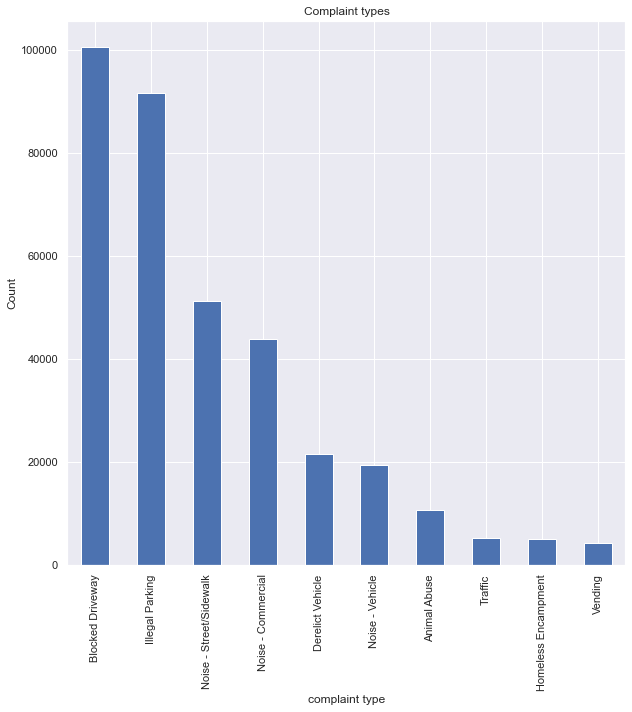

In [40]:
#plotting
new_dataset['Complaint Type'].value_counts().head(10).plot(kind='bar',figsize=(10,10),title='Complaint types',ylabel='Count',xlabel='complaint type',grid=True)

Conclusion1= Blocked Driveaway has maximum counts in complaint type

In [41]:
#checking from which location type complaints are most frequent

new_dataset['Location Type'].value_counts().head(10)

Street/Sidewalk               299388
Store/Commercial               25007
Club/Bar/Restaurant            21378
Residential Building/House      8861
Park/Playground                 4849
House of Worship                1066
Residential Building             533
Highway                          264
House and Store                  245
Parking Lot                      167
Name: Location Type, dtype: int64

<AxesSubplot:title={'center':'Location types'}, xlabel='location type', ylabel='Count'>

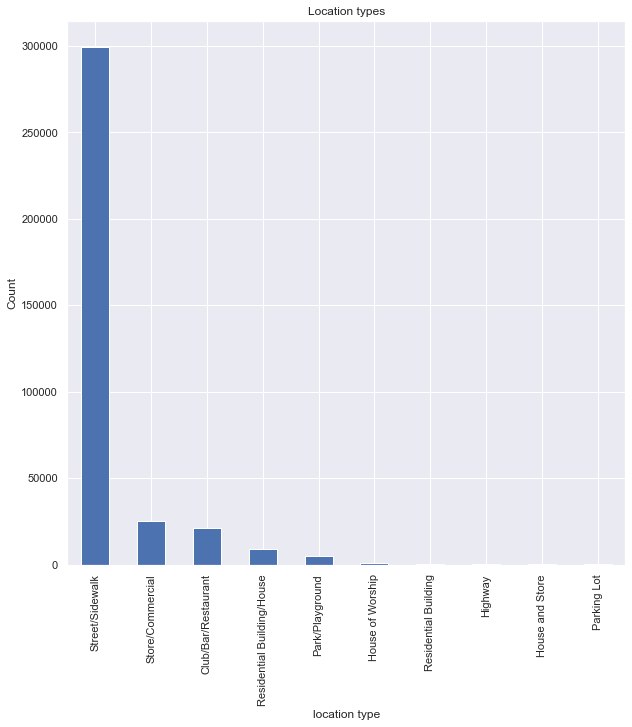

In [42]:
new_dataset['Location Type'].value_counts().head(10).plot(kind='bar',figsize=(10,10),title='Location types',ylabel='Count',xlabel='location type',grid=True)

# Conclusion2: Complaints are most frquent from street/sidewalk

In [43]:
# checking complaints are coming from which city frquently
new_dataset['City'].value_counts().head(10)

BROOKLYN         118849
NEW YORK          77289
BRONX             49166
STATEN ISLAND     15335
JAMAICA            8930
ASTORIA            7991
FLUSHING           7486
RIDGEWOOD          6391
CORONA             5383
WOODSIDE           4357
Name: City, dtype: int64

<AxesSubplot:title={'center':' CITIES'}, xlabel='CITIES', ylabel='Count'>

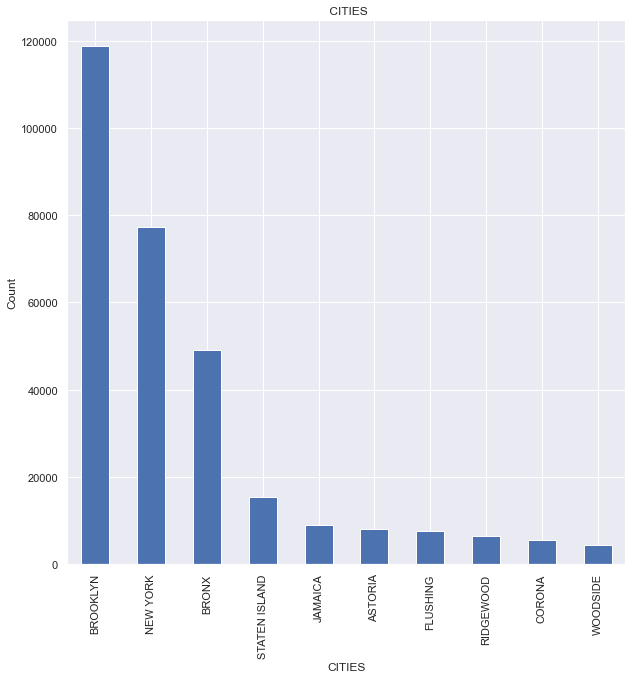

In [44]:
new_dataset['City'].value_counts().head(10).plot(kind='bar',figsize=(10,10),title=' CITIES',ylabel='Count',xlabel='CITIES',grid=True)

# Conclusion3:most frequently complaints comes from city brooklyn followed by new york

In [45]:
#plotting top 15 descriptors
new_dataset['Descriptor'].value_counts().head(10)

No Access                        75715
Loud Music/Party                 69080
Posted Parking Sign Violation    27013
Partial Access                   24909
Loud Talking                     23591
With License Plate               21518
Blocked Hydrant                  19797
Commercial Overnight Parking     14705
Blocked Sidewalk                 13711
Car/Truck Music                  11894
Name: Descriptor, dtype: int64

<AxesSubplot:title={'center':' CITIES'}, xlabel='CITIES', ylabel='Count'>

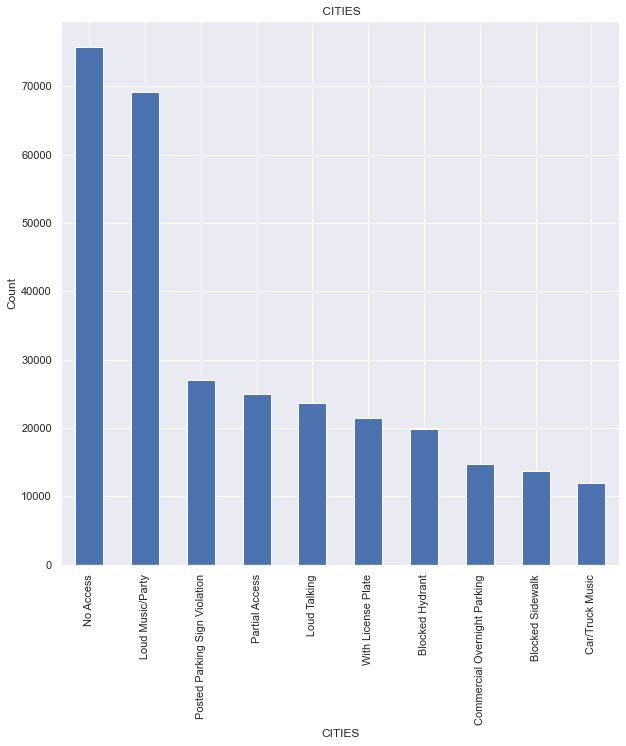

In [46]:
new_dataset['Descriptor'].value_counts().head(10).plot(kind='bar',figsize=(10,10),title=' CITIES',ylabel='Count',xlabel='CITIES',grid=True)

# Conclusion4: No access is maximum followed by loud music party

# Statistical test

In [47]:
# null hypothesis= avg response time across complaint type is similar
#alternate hypothesis= avg response time across complaint types isn't similar

In [48]:
#checking request closing time
new_dataset['Request_Closing_Time'].head(10)

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
5     6821.0
6     7102.0
7     6529.0
8    30814.0
9     5022.0
Name: Request_Closing_Time, dtype: float64

### Ordering the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [49]:
new_dataset.groupby(['Complaint Type'], sort= True).Request_Closing_Time.mean()

Complaint Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Derelict Vehicle             2.535960e+04
Disorderly Youth             1.236375e+04
Drinking                     1.382130e+04
Graffiti                     2.327634e+04
Homeless Encampment          1.545138e+04
Illegal Fireworks            1.011348e+04
Illegal Parking              1.565044e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Vehicle              1.256180e+04
Panhandling                  1.585355e+04
Posting Advertisement        7.286256e+03
Squeegee                     1.456025e+04
Traffic                      1.230912e+04
Urinating in Public          1.295929e+04
Vending                      1.436628e+04
Name: Request_Closi

In [50]:
new_dataset.Request_Closing_Time.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

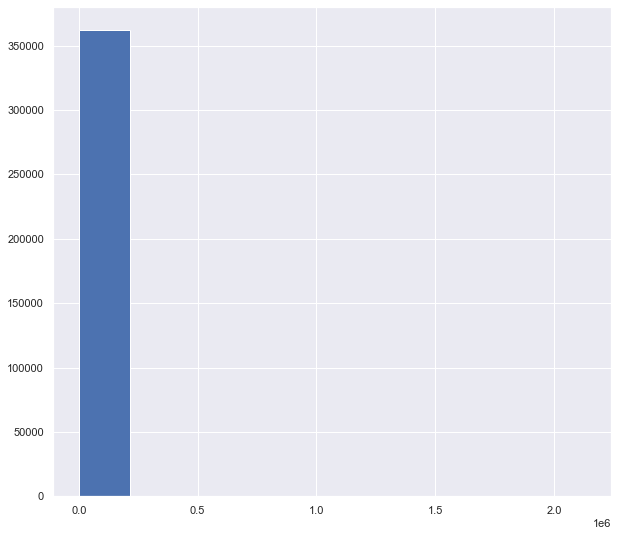

In [51]:
plt.figure(figsize=(10,9))
plt.hist(new_dataset['Request_Closing_Time'])
plt.show()

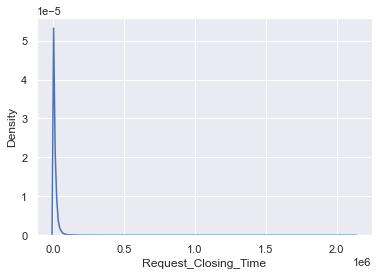

In [52]:
sns.set()
sns.distplot(new_dataset.Request_Closing_Time, hist= False)
plt.show()

In [53]:
from scipy.stats import shapiro
stats,p=shapiro(new_dataset.Request_Closing_Time)
print(stats,p)

0.5136188268661499 0.0


### the data is not normally distributed

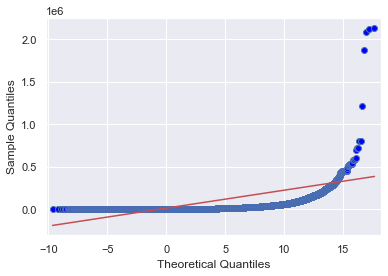

In [54]:
import statsmodels.api as sm
import pylab
sm.qqplot(new_dataset.Request_Closing_Time, loc = 4, scale = 3, line='s')
pylab.show()

### Whether the average response time across complaint types is similar or not (overall)

In [55]:
Complaint_Types= new_dataset[ 'Complaint Type'].unique()
Complaint_Types

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [73]:
len(Complaint_Types)

23

In [72]:
new=[]
for i in Complaint_Types:
   new.append(new_dataset.loc[new_dataset['Complaint Type']==i]['Request_Closing_Time'].ravel())

In [65]:
len(new)


23

In [66]:
new[20]

array([27090., 37381.,  9736., 24686.,  4073., 10628., 30818.,  1901.])

Kruskal Wallis H Test

Fail to Reject H0: All sample distributions are equal.

Reject H0: One or more sample distributions are not equal.

In [67]:
from scipy.stats import kruskal
# compare samples
stat, p = kruskal(new[0],new[1], new[2],new[3], new[4], new[5], new[6], new[7], new[8], new[9], new[10], new[11], new[12], new[13], new[14], new[15], new[16], new[17], new[18], new[19],new[20], new[21], new[22])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=11988.269, p=0.000
Different distributions (reject H0)


Hence it is proved requested closing time is not equally distributed

### Are the type of complaint or service requested and location related?

In [60]:
#contingency Table for complaints
contingency_table = pd.crosstab(new_dataset['City'],new_dataset['Complaint Type'], margins= True)
contingency_table.head()

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,2,29,10,1,0,0,1,1,1,259
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,64,409,236,2,3,0,60,10,57,7991
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,145,0,0,0,0,0,0,0,905
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,4,17,24,0,0,0,9,0,2,1550
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,13,11,1,1,0,9,1,0,487


In [61]:
contingency_table.shape

(54, 23)

### first five rows and 24 columns

In [62]:
contingency_table.iloc[0:5][0:24].values

array([[  46,    0,    0,   50,   32,    2,    1,    1,    4,    0,   62,
           2,   14,    2,   29,   10,    1,    0,    0,    1,    1,    1,
         259],
       [ 170,    0,   16, 3436,  426,    5,   43,    4,   32,    4, 1340,
        1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,   57,
        7991],
       [   0,    0,    0,  159,   14,    0,    0,    0,    0,    0,  277,
         310,    0,    0,  145,    0,    0,    0,    0,    0,    0,    0,
         905],
       [  53,    0,    0,  514,  231,    2,    1,    3,    2,    0,  638,
          47,    3,    4,   17,   24,    0,    0,    0,    9,    0,    2,
        1550],
       [  15,    0,    1,  138,  120,    2,    1,    0,    1,    1,  132,
          38,    1,    1,   13,   11,    1,    1,    0,    9,    1,    0,
         487]], dtype=int64)

In [63]:
f_obs= []
for i in range(0, contingency_table.shape[0]-1):
    f_obs.append(contingency_table.iloc[i][0:24].values)
f_obs= np.array(f_obs)
f_obs[0:5]

array([[  46,    0,    0,   50,   32,    2,    1,    1,    4,    0,   62,
           2,   14,    2,   29,   10,    1,    0,    0,    1,    1,    1,
         259],
       [ 170,    0,   16, 3436,  426,    5,   43,    4,   32,    4, 1340,
        1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,   57,
        7991],
       [   0,    0,    0,  159,   14,    0,    0,    0,    0,    0,  277,
         310,    0,    0,  145,    0,    0,    0,    0,    0,    0,    0,
         905],
       [  53,    0,    0,  514,  231,    2,    1,    3,    2,    0,  638,
          47,    3,    4,   17,   24,    0,    0,    0,    9,    0,    2,
        1550],
       [  15,    0,    1,  138,  120,    2,    1,    0,    1,    1,  132,
          38,    1,    1,   13,   11,    1,    1,    0,    9,    1,    0,
         487]], dtype=int64)

### chi squared test
H0:There is no statistically significant relationship between City and Complaint Type.

Ha:There is a statistically significant relationship between City and Complaint Type.

In [74]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:5]

(141343.23155024176,
 0.0,
 1144,
 array([[7.54353629e+00, 7.16453252e-04, 3.38882388e-01, ...,
         4.59246535e-01, 2.99764041e+00, 2.59000000e+02],
        [2.32742851e+02, 2.21049341e-02, 1.04556338e+01, ...,
         1.41692628e+01, 9.24870444e+01, 7.99100000e+03],
        [2.63586886e+01, 2.50343704e-03, 1.18412572e+00, ...,
         1.60470314e+00, 1.04743806e+01, 9.05000000e+02],
        ...,
        [9.03476818e+01, 8.58084165e-03, 4.05873810e+00, ...,
         5.50031950e+00, 3.59022415e+01, 3.10200000e+03],
        [1.26900338e+02, 1.20524588e-02, 5.70081299e+00, ...,
         7.72562607e+00, 5.04274875e+01, 4.35700000e+03],
        [4.83485338e+00, 4.59193976e-04, 2.17198751e-01, ...,
         2.94343339e-01, 1.92126760e+00, 1.66000000e+02]]))

p value is 0,so we reject null hypothesis,
It proves their is some sort of relationship between city and complaint type